In [1]:
import sys
sys.path.append('../')
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from smodels.theory.element import Element
from smodels.particlesLoader import BSMList
from smodels.share.models.SMparticles import SMList
from smodels.theory.model import Model
from smodels.theory.tree import Tree
import itertools


In [2]:
slhafile = '../inputFiles/slha/lightEWinos.slha'
model = Model( BSMparticles=BSMList, SMparticles=SMList)
model.updateParticles(inputFile=slhafile,erasePrompt=['spin'])

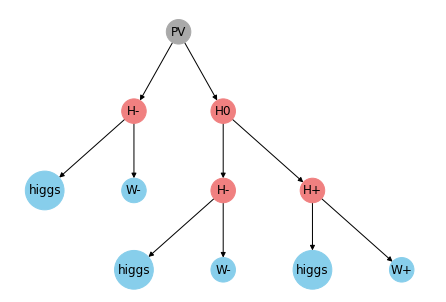

[PV, H-, H0, higgs, W-, H-, H+, higgs, W-, higgs, W+]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[(PV, H-), (PV, H0), (H-, higgs), (H-, W-), (H0, H-), (H0, H+), (H-, higgs), (H-, W-), (H+, higgs), (H+, W+)]


In [3]:
stringEla = "(PV > H0(1),H-(2)), (H0(1) > H+(3),H-(4)), (H+(3) > W+,higgs), (H-(4) > W-,higgs), (H-(2) > W-,higgs)"
ela = Element(info=stringEla,model=model)
ela.drawTree(nodeScale=3)
print(ela.tree.nodes)
print([n.node for n in ela.tree.nodes])
print(ela.tree.edges)

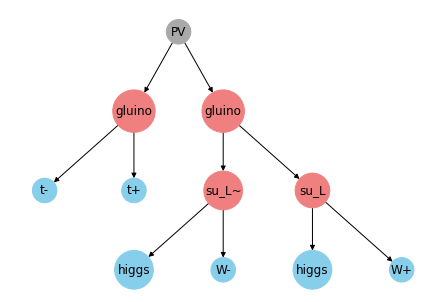

[PV, gluino, gluino, t-, t+, su_L~, su_L, higgs, W-, higgs, W+]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[(PV, gluino), (PV, gluino), (gluino, t-), (gluino, t+), (gluino, su_L~), (gluino, su_L), (su_L~, higgs), (su_L~, W-), (su_L, higgs), (su_L, W+)]


In [4]:
stringElb = "(PV > gluino(1),gluino(2)), (gluino(2) > t+,t-), (gluino(1) > su_L(3),su_L~(4)), (su_L(3) > higgs,W+), (su_L~(4) > higgs,W-)"
elb = Element(info=stringElb,model=model)
elb.drawTree(nodeScale=3)
print(elb.tree.nodes)
print([n.node for n in elb.tree.nodes])
print(elb.tree.edges)

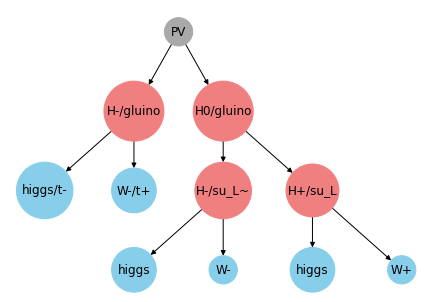

[PV, H-/gluino, H0/gluino, higgs/t-, W-/t+, H-/su_L~, H+/su_L, higgs, W-, higgs, W+]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[(PV, H-/gluino), (PV, H0/gluino), (H-/gluino, higgs/t-), (H-/gluino, W-/t+), (H0/gluino, H-/su_L~), (H0/gluino, H+/su_L), (H-/su_L~, higgs), (H-/su_L~, W-), (H+/su_L, higgs), (H+/su_L, W+)]


In [5]:
newEl = ela+elb
newEl.drawTree()
print(newEl.tree.nodes)
print([n.node for n in newEl.tree.nodes])
print(newEl.tree.edges)